# Importing Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import numpy as np




# Reading dataset

In [2]:
dataset = pd.read_excel("HousePricePrediction.xlsx")

In [3]:
df=pd.read_csv("HousePricePrediction.csv")

In [4]:
#Let see how many columns the dataset has,data types of each columns and which columns do have missing values?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [5]:
df.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
LotConfig        object
BldgType         object
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
Exterior1st      object
BsmtFinSF2      float64
TotalBsmtSF     float64
SalePrice       float64
dtype: object

In [6]:
df.shape

(2919, 13)

# Printing first 5 records of the dataset

In [7]:

print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [8]:
# To get last 10 rows of the data
df.tail(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
2909,2909,180,RM,1470,Inside,Twnhs,6,1970,1970,CemntBd,0.0,630.0,NaN
2910,2910,160,RM,1484,Inside,TwnhsE,4,1972,1972,CemntBd,0.0,546.0,NaN
2911,2911,20,RL,13384,Inside,1Fam,5,1969,1979,Plywood,344.0,1104.0,NaN
2912,2912,160,RM,1533,Inside,Twnhs,5,1970,1970,CemntBd,0.0,546.0,NaN
2913,2913,160,RM,1526,Inside,Twnhs,5,1970,1970,CemntBd,0.0,546.0,NaN
2914,2914,160,RM,1936,Inside,Twnhs,7,1970,1970,CemntBd,0.0,546.0,NaN
2915,2915,160,RM,1894,Inside,TwnhsE,5,1970,1970,CemntBd,0.0,546.0,NaN
2916,2916,20,RL,20000,Inside,1Fam,7,1960,1996,VinylSd,0.0,1224.0,NaN
2917,2917,85,RL,10441,Inside,1Fam,5,1992,1992,HdBoard,0.0,912.0,NaN
2918,2918,60,RL,9627,Inside,1Fam,5,1993,1994,HdBoard,0.0,996.0,NaN


In [9]:
dataset.shape

(2919, 13)

In [10]:
#to see how the existing columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'LotConfig', 'BldgType',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'Exterior1st', 'BsmtFinSF2',
       'TotalBsmtSF', 'SalePrice'],
      dtype='object')

In [11]:
# to see the total numbers of null in each columns 
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [12]:
# The dataframe column 'Province/State',if full of nan value, so I droped this column.
df.drop('SalePrice',axis=1,inplace=True)

In [13]:
# To get the unique countries count
df['MSSubClass'].nunique()

16

In [14]:
# Change Date column of dataframe to date type
df['LotArea']=pd.to_datetime(df['LotArea'])

In [15]:
# To set Date column index of the dataframe 
df.set_index('LotArea',inplace=True)

In [16]:
# Let see the change in index
df.head()

,Id,MSSubClass,MSZoning,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF
LotArea,,,,,,,,,,,
1970-01-01 00:00:00.000008450,0,60,RL,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0
1970-01-01 00:00:00.000009600,1,20,RL,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0
1970-01-01 00:00:00.000011250,2,60,RL,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0
1970-01-01 00:00:00.000009550,3,70,RL,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0
1970-01-01 00:00:00.000014260,4,60,RL,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0


# Data Preprocessing

In [17]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 4
Integer variables: 0
Float variables: 3


# Exploratory Data Analysis

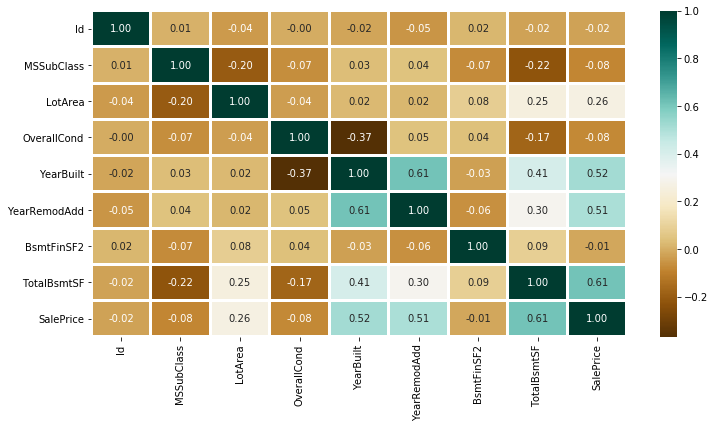

In [18]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
			cmap = 'BrBG',
			fmt = '.2f',
			linewidths = 2,
			annot = True)


To analyze the different categorical features. Let’s draw the barplot.

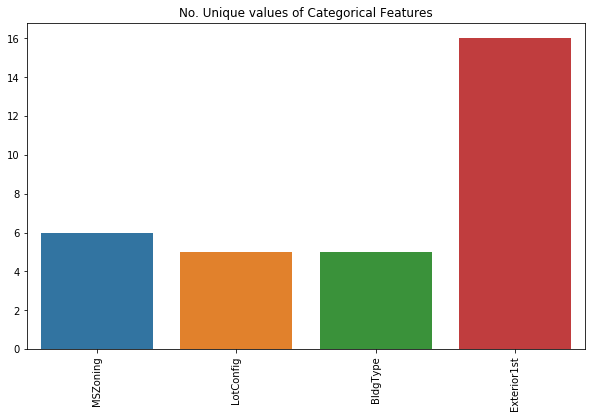

In [19]:
unique_values = []
for col in object_cols:
    unique_values.append(dataset[col].unique().size)

plt.figure(figsize=(10, 6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols, y=unique_values)


The plot shows that Exterior1st has around 16 unique categories and other features have around  6 unique categories. To findout the actual count of each category I can plot the bargraph of each four features separately.

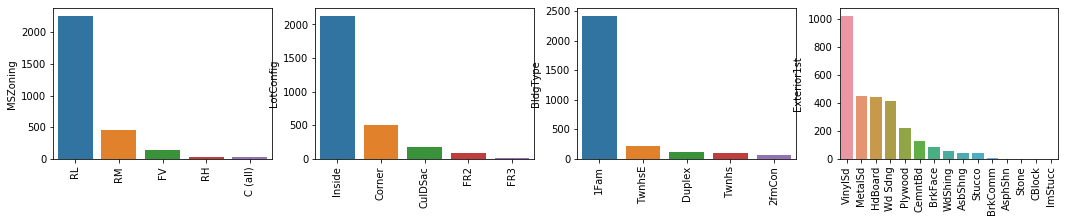

In [20]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
	y = dataset[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1


# Data Cleaning

# Data Cleaning is the way to improvise the data or remove incorrect, corrupted or irrelevant data.

As in our dataset, there are some columns that are not important and irrelevant for the model training. So, we can drop that column before training. There are 2 approaches to dealing with empty/null values

I can easily delete the column/row (if the feature or record is not much important).
Filling the empty slots with mean/mode/0/NA/etc. (depending on the dataset requirement).
As Id Column will not be participating in any prediction. So we can Drop it.

In [21]:
dataset.drop(['Id'],
			axis=1,
			inplace=True)


Replacing SalePrice empty values with their mean values to make the data distribution symmetric.

In [22]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
dataset['SalePrice'].mean())


Drop records with null values (as the empty records are very less).

In [23]:
new_dataset = dataset.dropna()


Checking features which have null values in the new dataframe (if there are still any).

In [24]:
new_dataset.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

# OneHotEncoder – For Label categorical features
One hot Encoding is the best way to convert categorical data into binary vectors. This maps the values to integer values. By using OneHotEncoder, I can easily convert object data into int. So for that, firstly I have to collect all the features which have the object datatype. To do so, I will make a loop.

In [25]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
	len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


Then once we have a list of all the features. I can apply OneHotEncoding to the whole list.

In [26]:
OH_encoder = OneHotEncoder(sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


# Splitting Dataset into Training and Testing
X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
	X, Y, train_size=0.8, test_size=0.2, random_state=0)



# Model and Accuracy
As I have to train the model to determine the continuous values, so I will be using these regression models.

SVM-Support Vector Machine
Random Forest Regressor
Linear Regressor
And To calculate loss I will be using the mean_absolute_percentage_error module. It can easily be imported by using sklearn library. The formula for Mean Absolute Error : 

# SVM – Support vector Machine
SVM can be used for both regression and classification model. It finds the hyperplane in the n-dimensional plane.

In [28]:

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Your code for loading, preprocessing, and splitting the data (X_train, Y_train, X_valid, Y_valid)

model_SVR = svm.SVR()
model_SVR.fit(X_train, Y_train)
Y_pred = model_SVR.predict(X_valid)

mape = mean_absolute_percentage_error(Y_valid, Y_pred)
print("Mean Absolute Percentage Error:", mape)


Mean Absolute Percentage Error: 18.70512931870424


# Random Forest Regression
Random Forest is an ensemble technique that uses multiple of decision trees and can be used for both regression and classification tasks.

In [29]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


18.37142894511335

# Linear Regression
Linear Regression predicts the final output-dependent value based on the given independent features.

In [30]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


18.741683841599936


# CatBoost Classifier
CatBoost is a machine learning algorithm implemented by Yandex and is open-source.